In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from face import BaseFACE, FACE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.DataFrame(np.load('toy_example/data.npy'), columns=['x', 'y'])
with open('toy_example/model.pkl', 'rb') as f:
    clf = pickle.load(f)

250 nodes have been added to graph.
1625 edges have been added to graph.
1 node has been added to graph.
18 edges have been added.


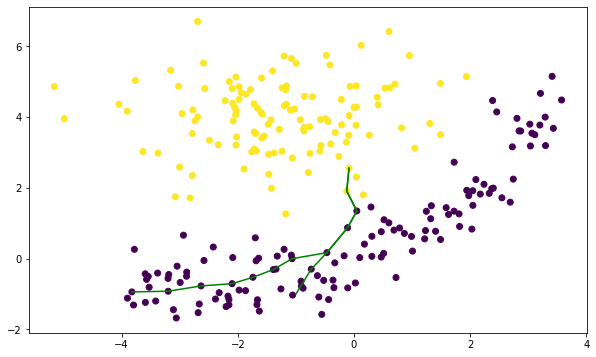

In [3]:
ce = BaseFACE(data, clf, dist_threshold=0.8, pred_threshold=0.99)
eg1 = data.iloc[0].values
path1, _ = ce.generate_counterfactual(eg1)
eg2 = np.array([-1, -1])
path2, _ = ce.generate_counterfactual(eg2)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data['x'], data['y'], c=clf.predict(data))
ax.plot(path1['x'], path1['y'], 'green')
ax.plot(path2['x'], path2['y'], 'green')

250 nodes have been added to graph.
21 nodes removed due to low density.
1596 edges have been added to graph.
1 node has been added to graph.
18 edges have been added.


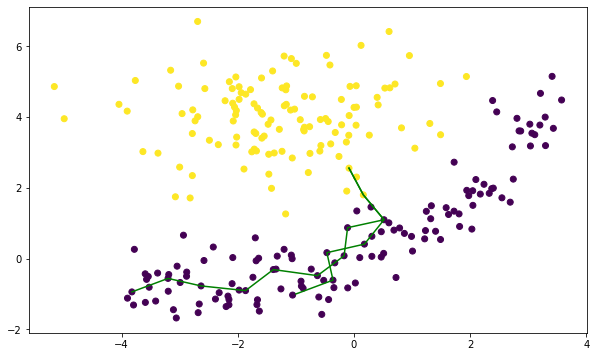

In [4]:
ce = FACE(data, clf, dist_threshold=0.8, pred_threshold=0.99, density_threshold=0.01)
path1, _ = ce.generate_counterfactual(eg1)
path2, _ = ce.generate_counterfactual(eg2)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data['x'], data['y'], c=clf.predict(data))
ax.plot(path1['x'], path1['y'], 'green')
ax.plot(path2['x'], path2['y'], 'green')

In [5]:
adult = pd.read_csv('../Tom/adult.csv', index_col=0, nrows=1e3)
x_adult = adult[['age', 'education', 'sex', 'weekly-hours']].values
y_adult = adult[['compensation']].values.squeeze()
scaler = StandardScaler().fit(x_adult)
x_adult = scaler.transform(x_adult)
svm = SVC(probability=True)
svm.fit(x_adult, y_adult)
print(svm.score(x_adult, y_adult))

0.799


In [6]:
np.save('adult/data', x_adult)
with open('adult/model.pkl', 'wb') as file:
    pickle.dump(svm, file)
with open('adult/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [7]:
data = pd.DataFrame(np.load('adult/data.npy'), columns=['age', 'education', 'sex', 'weekly-hours'])
with open('adult/model.pkl', 'rb') as f:
    clf = pickle.load(f)
with open('adult/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

In [12]:
ce = BaseFACE(data, clf, dist_threshold=0.5, pred_threshold=0.8)
eg = data.iloc[0].values
path, pred = ce.generate_counterfactual(eg)
pd.DataFrame(scaler.inverse_transform(path), columns=list(data))

1000 nodes have been added to graph.
11525 edges have been added to graph.


,age,education,sex,weekly-hours
0,39.0,1.0,1.0,40.0
1,42.0,1.0,1.0,45.0
2,43.0,1.0,1.0,50.0
3,45.0,1.0,1.0,55.0


In [13]:
pred

,prediction,probability
0,0.0,0.510213
1,1.0,0.661037
2,1.0,0.755974
3,1.0,0.809314


In [14]:
ce = FACE(data, clf, dist_threshold=0.5, density_threshold=0.01, pred_threshold=0.8)
path, pred = ce.generate_counterfactual(eg)
pd.DataFrame(scaler.inverse_transform(path), columns=list(data))

10870 edges have been added to graph.


,age,education,sex,weekly-hours
0,39.0,1.0,1.0,40.0
1,39.0,1.0,1.0,45.0
2,42.0,1.0,1.0,50.0
3,45.0,1.0,1.0,55.0


1000 nodes have been added to graph.
352 nodes removed due to low density.


In [15]:
pred

,prediction,probability
0,0.0,0.510213
1,1.0,0.598884
2,1.0,0.740266
3,1.0,0.809314
